In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv('data/combined_subsets.csv')

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.7.0


In [3]:
from collections import Counter

In [4]:
# drop nulls from df
stroke_data_df = data.dropna()

# set y as the 'stroke' output, with targets of 0 (No) and 1 (Yes)
y = stroke_data_df['stroke']
target_names = ['0', '1']

# set X as the df after dropping stroke output and id
X = stroke_data_df.drop('stroke', axis=1).drop('id',axis=1)

# define a smote instance with default parameters
oversample = SMOTE()

# rebalance data by applying SMOTE to add instances of 'Yes'
X, y = oversample.fit_resample(X, y)

# show new counts of output variables by type (should be same)
counter = Counter(y)
print(counter)

Counter({1: 28524, 0: 28524})


In [6]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

In [7]:
stroke_data_df = data.dropna()
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,0,1,105.92,32.5,0,1
2,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,1665,0,79.0,1,0,1,1,1,174.12,24.0,0,1
4,56669,1,81.0,0,0,1,0,0,186.21,29.0,1,1


In [8]:
# Create separate df for records that have stroke and have no stroke
stroke_positive = stroke_data_df[stroke_data_df['stroke'] == 1]
stroke_negative = stroke_data_df[stroke_data_df['stroke'] == 0]

# return random sample of 500 for both postive and negative results
stroke_negative_sample = stroke_negative.sample(500)
stroke_positive_sample = stroke_positive.sample(500)

# merge postive and negative df to make one combined df
stroke_sample = pd.merge(stroke_negative_sample, stroke_positive_sample, how = 'outer')

stroke_sample.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,11267,0,31.0,0,0,1,0,0,115.15,27.1,0,0
1,32362,1,44.0,0,0,1,0,1,74.88,26.3,2,0
2,39954,1,61.0,0,0,1,0,1,197.58,38.0,0,0
3,34343,1,47.0,0,0,1,0,1,88.77,34.3,2,0
4,40938,1,28.0,0,0,0,0,0,96.84,30.4,1,0


# K Nearest Neighbor (KNN)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.948
k: 3, Train/Test Score: 0.956/0.930
k: 5, Train/Test Score: 0.935/0.917
k: 7, Train/Test Score: 0.923/0.908
k: 9, Train/Test Score: 0.913/0.900
k: 11, Train/Test Score: 0.906/0.894
k: 13, Train/Test Score: 0.899/0.890
k: 15, Train/Test Score: 0.894/0.887
k: 17, Train/Test Score: 0.889/0.882
k: 19, Train/Test Score: 0.884/0.878
k: 21, Train/Test Score: 0.881/0.875
k: 23, Train/Test Score: 0.877/0.872
k: 25, Train/Test Score: 0.873/0.869
k: 27, Train/Test Score: 0.871/0.866
k: 29, Train/Test Score: 0.868/0.865
k: 31, Train/Test Score: 0.866/0.862
k: 33, Train/Test Score: 0.864/0.859
k: 35, Train/Test Score: 0.861/0.857
k: 37, Train/Test Score: 0.859/0.855
k: 39, Train/Test Score: 0.857/0.853


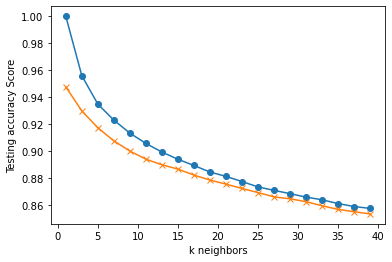

In [10]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot score results for training and test sets for each k=N    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Print test score for best k
# k: 5 appears to be best (scores plateau at 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Train Acc: %.3f' % knn.score(X_train, y_train))
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Train Acc: 0.935
k=5 Test Acc: 0.917


In [12]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions,
                            target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.99      0.84      0.91      7075
      Stroke       0.86      0.99      0.92      7187

    accuracy                           0.92     14262
   macro avg       0.93      0.92      0.92     14262
weighted avg       0.93      0.92      0.92     14262



## Use cell below to make predictions with KNN model

### List of input values in order (with codification)
 - Gender (Female=0,Male=1,Other=2)
 - Age (actual value)
 - Hypertension (No=0,Yes=1)
 - Heart Diserase (No=0,Yes=1)
 - Married (No=0,Yes=1)
 - Work Type (Private=0,Self-employed=1,children=2,Govt_job=3,Never_worked=4")
 - Residence Type (Urban=0,Rural=1)
 - Blood Glucose Level (actual value)
 - BMI (actual value)
 - Smoking (never smoked=0,formerly smoked=1,smokes=2,unkown=3)

### Output prediction value
 - Have you had a Stroke? (No=0,Yes=1)

In [13]:
sample = [[1,27,0,0,0,0,0,100,29,1]]
prediction = knn.predict(sample)
print(prediction)

[0]


## Save Model to File

In [ ]:
import joblib

In [ ]:
filename = 'knn_model.sav'

#dump model to file
joblib.dump(knn, filename)

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(sample)
print(result)